In [1]:
from MoneyModel import *

In [2]:
model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()
    

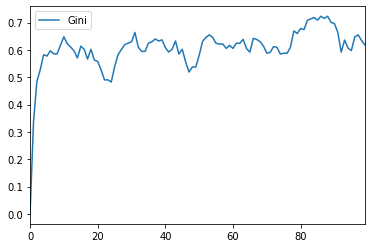

In [3]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [4]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

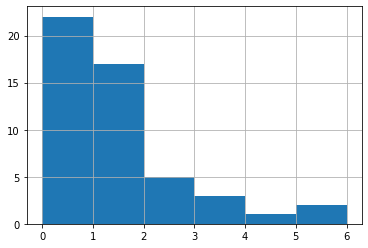

In [6]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max()+1))

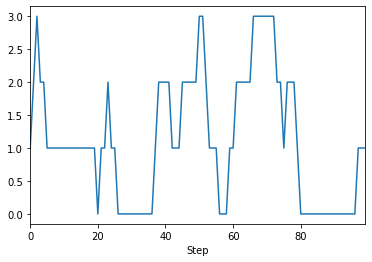

In [7]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()

In [8]:
one_agent_wealth.head()

,Wealth
Step,
0,1
1,2
2,3
3,2
4,2
